# Clase sobre imputacion de data y analisis de Valores Nulls

In [41]:
import pandas as pd
import numpy as np

In [42]:
URL_DATASET = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"

In [43]:
df = pd.read_csv(URL_DATASET, header=None, sep=",",names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])

In [44]:
df.replace(0,np.nan, inplace=True)

In [45]:
(df.isna().mean() * 100).round(2).sort_values(ascending=False)

Outcome                     65.10
Insulin                     48.70
SkinThickness               29.56
Pregnancies                 14.45
BloodPressure                4.56
BMI                          1.43
Glucose                      0.65
DiabetesPedigreeFunction     0.00
Age                          0.00
dtype: float64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               657 non-null    float64
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   268 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


## Analisiside cantidad de nulls

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,657.0,4.494673,3.217291,1.000,2.00000,4.0000,7.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,268.0,1.000000,0.000000,1.000,1.00000,1.0000,1.00000,1.00


## Imputacion por la mediana
- Mediana vs Media(Promedio)

Para un proyecto de machine learning, la elección entre media, moda y mediana depende del tipo de datos y del contexto específico. Te explico cuándo usar cada una:

## **Media (Promedio)**
**Cuándo usarla:**
- Con datos numéricos continuos sin valores atípicos extremos
- Cuando la distribución es aproximadamente normal
- Para variables como edad, ingresos, temperatura, etc. (sin outliers)

**Ejemplo:** Si tienes edades como [25, 28, 30, 32, 35], la media (30) representa bien el conjunto.

## **Mediana**
**Cuándo usarla:**
- Con datos numéricos que tienen valores atípicos (outliers)
- Cuando la distribución es sesgada
- Para datos ordinales
- Es más robusta ante valores extremos

**Ejemplo:** En ingresos como [30K, 35K, 40K, 45K, 500K], la mediana (40K) es más representativa que la media (130K).

## **Moda**
**Cuándo usarla:**
- Con datos categóricos (texto, etiquetas)
- Con datos numéricos discretos donde buscas el valor más frecuente
- Para variables como género, país, categoría de producto, etc.

**Ejemplo:** En una columna de países [México, Argentina, México, Brasil, México], la moda es "México".

## **Recomendaciones prácticas:**

1. **Analiza primero la distribución** de tus datos con histogramas o boxplots
2. **Detecta outliers** antes de decidir
3. **Considera el contexto del negocio** - ¿qué medida tiene más sentido para tu problema?
4. **Prueba diferentes enfoques** y evalúa el impacto en tu modelo


In [48]:
import matplotlib.pyplot as plt

def generar_distribuciones(df: pd.DataFrame) -> None:
    fig = plt.figure(figsize=(16, 9))
    df.hist(bins=20, figsize=(16, 9), layout=(3, 3), color='skyblue', alpha=0.7, edgecolor='black')
    plt.suptitle('Distribuciones ', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

In [49]:
medianas = df.median()

In [50]:
df_imputada_mediana = df.fillna(medianas)

In [61]:
# generar_distribuciones(df_imputada_mediana)

## Usando tecnicas mas eficientes dado a la cantidad de datos nulls

In [56]:
# Imputacion por medio de Simple Imputer
columna_simple_imputer = ['BMI']
columnas_knn_imputer = ['Glucose', 'BloodPressure', 'Outcome']
columnas_iterative_imputer = ['Pregnancies', 'SkinThickness', 'Insulin', ]

In [60]:
from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
# Crear una copia del dataframe para no modificar el original
df_imputed = df.copy()

# 1. Aplicando SimpleImputer -> es muy similar a la imputacion anterior
imputer_simple = SimpleImputer(strategy='median')
df_imputed[columna_simple_imputer] = imputer_simple.fit_transform(df_imputed[columna_simple_imputer])

# 2. Aplicar KNNImputer al resto de las columnas
imputer_knn = KNNImputer(n_neighbors=5)
df_imputed[columnas_knn_imputer] = imputer_knn.fit_transform(df_imputed[columnas_knn_imputer])

# 3. Imputacion Iterativa -> Un poco mas rousta para casos un poco mas interesantes
imputer_iterative = IterativeImputer(
    estimator=BayesianRidge(
        max_iter=500,
        tol=1e-4,
        alpha_1=1e-5,
        alpha_2=1e-5
    ),
    max_iter=20,           # Máximo de iteraciones del MICE
    tol=1e-3,              # Tolerancia de convergencia
    n_nearest_features=10, # Máximo de features a usar
    initial_strategy='mean', # Estrategia inicial
    imputation_order='ascending', # Orden de imputación
    random_state=42
)

df_imputed[columnas_iterative_imputer] = imputer_iterative.fit_transform(df_imputed[columnas_iterative_imputer])

print("DataFrame con valores nulos imputados:")
print(df_imputed.isnull().sum())

DataFrame con valores nulos imputados:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


<Figure size 1600x900 with 0 Axes>

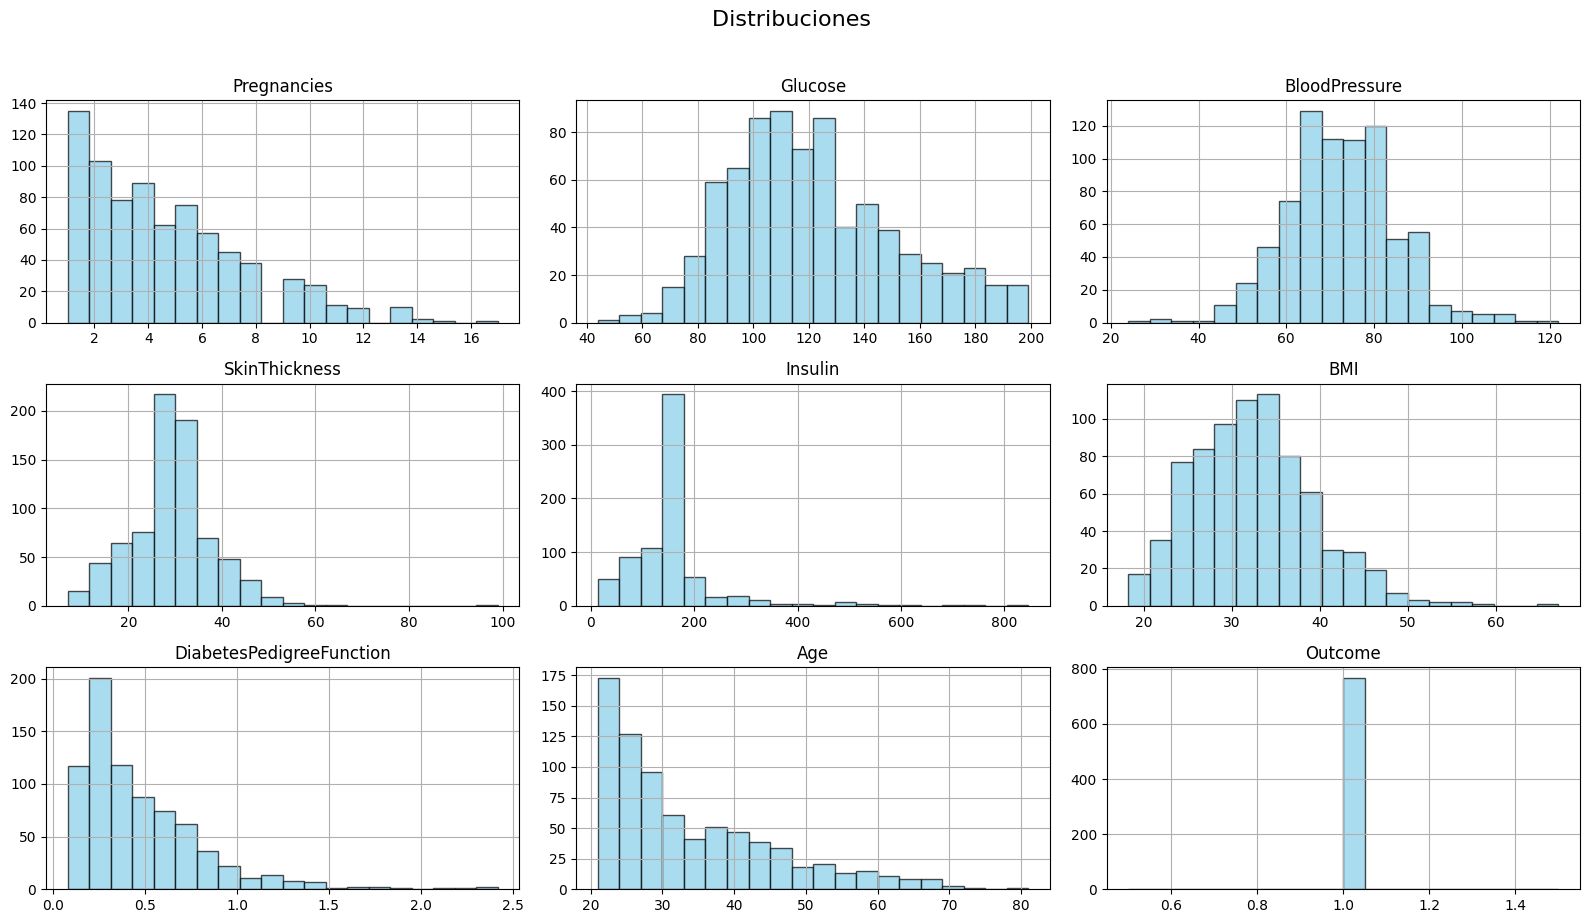

In [62]:
generar_distribuciones(df_imputed)